## 1. Общее исследование данных

In [1]:
%pip install polars


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import polars as pl


In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape


(12330, 18)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

В датасете представлены 18 переменных. Целевой является Revenue, она является бинарной. Значит, стоит задача классификации. Среди остальных переменных имеются 1 булевая (Weekend), 2 класса object (категориальные) - Month и VisitorType. Остальные переменные представляют собой численный формат.

In [6]:
df.describe(include='all')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3348,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


Теперь проверим дублирующиеся строки и при наличии таковых, удалим их

In [7]:
df.duplicated().sum()


np.int64(109)

In [8]:
df.drop_duplicates(inplace=True)


## 2. Однофакторный анализ

Рассмотрим данные с целью выявления пропусков. И если таковые имеются, выберем оптимальную стратегию для работы с ними

In [9]:
df.isnull().sum()


Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration     199
ProductRelated               0
ProductRelated_Duration    489
BounceRates                  0
ExitRates                   99
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

6.44% представленных данных содержат пропуски. Это слишком много, чтобы их удалить, поэтому следует исследовать данные более детально, чтобы выяснить лучший способ замены значений. 

In [10]:
df['Informational_Duration'].value_counts(normalize=True)


Informational_Duration
0.000       0.803444
9.000       0.002662
10.000      0.002080
7.000       0.002080
6.000       0.002080
              ...   
1060.750    0.000083
290.225     0.000083
407.500     0.000083
103.250     0.000083
155.375     0.000083
Name: proportion, Length: 1241, dtype: float64

В данном случае "0" встречается в 80% значений, поэтому рационально будет заполнить пропуски этой категории модой.

In [11]:
df['Informational_Duration'].fillna(0, inplace=True)


C:\Users\tyrys\AppData\Local\Temp\ipykernel_21828\3848387972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Informational_Duration'].fillna(0, inplace=True)


In [12]:
df['ProductRelated_Duration'].value_counts(normalize=True)


ProductRelated_Duration
0.000000       0.052421
17.000000      0.001620
11.000000      0.001449
8.000000       0.001364
15.000000      0.001364
                 ...   
185.250000     0.000085
172.000000     0.000085
655.542857     0.000085
1168.619841    0.000085
87.916667      0.000085
Name: proportion, Length: 9210, dtype: float64

Во втором случае не получится заменить пропуски модой. Так как значения слишком разные, следует заменить пропуски медианой, так как она более устойчива к выбросам.

In [13]:
df['ProductRelated_Duration'].fillna(df['ProductRelated_Duration'].median(), 
    inplace=True)


C:\Users\tyrys\AppData\Local\Temp\ipykernel_21828\3167559999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ProductRelated_Duration'].fillna(df['ProductRelated_Duration'].median(),


In [14]:
df['ExitRates'].value_counts(normalize=True) # Ситуация аналогична предыдущей


ExitRates
0.200000    0.049084
0.100000    0.027306
0.050000    0.026976
0.033333    0.023841
0.066667    0.022026
              ...   
0.025833    0.000082
0.050821    0.000082
0.020353    0.000082
0.001795    0.000082
0.032193    0.000082
Name: proportion, Length: 4746, dtype: float64

In [15]:
df['ExitRates'].fillna(df['ExitRates'].median(), inplace=True)


C:\Users\tyrys\AppData\Local\Temp\ipykernel_21828\3885359811.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ExitRates'].fillna(df['ExitRates'].median(), inplace=True)


In [16]:
df.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Рассмотрим распределения числовых переменных

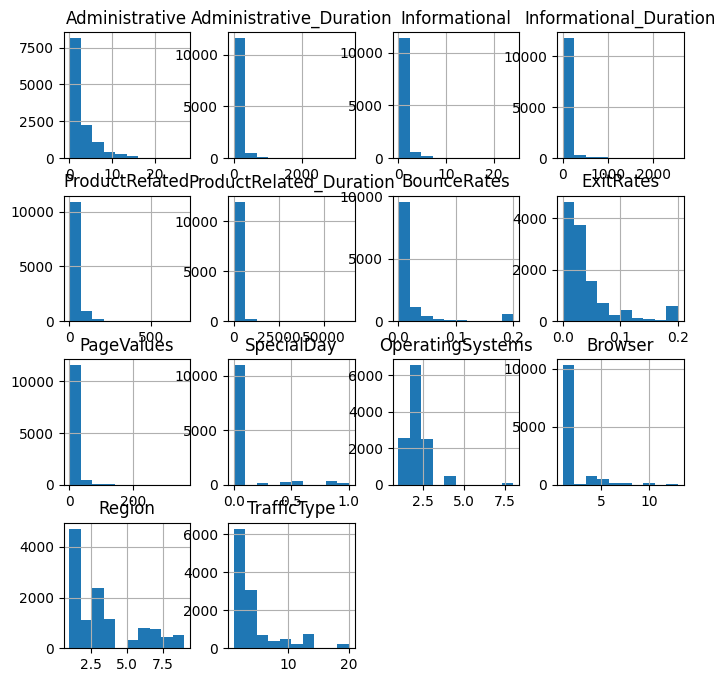

In [17]:
df.hist(figsize=(8,8));


Графики распределений имеют выбросы. Посмотрим изменится ли ситуация при применении логарифмирования.

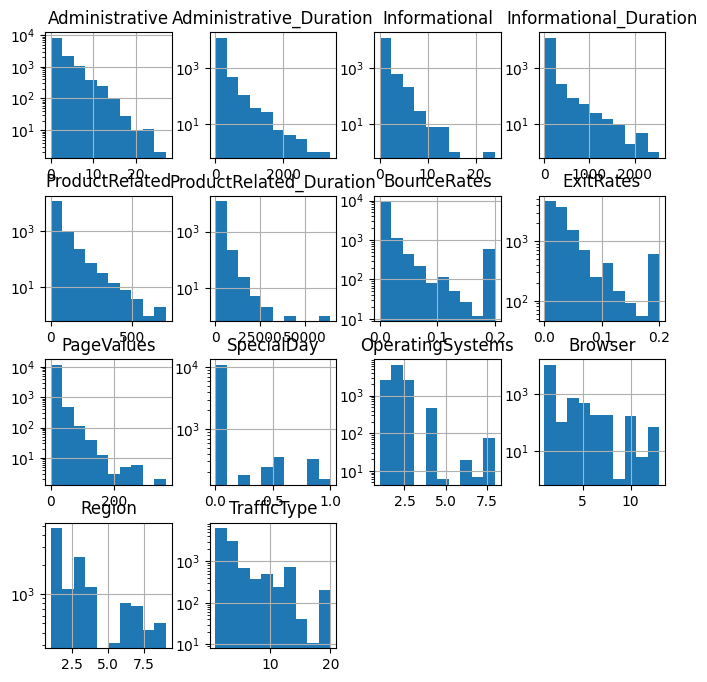

In [18]:
df.hist(figsize=(8,8), log=True);


Стало лучше, но выбросы всё ещё имеются

А теперь посмотрим на категориальные

In [19]:
# На графике Month я увидел, что у нас существуют значения Aug и aug, 
# что является опечаткой. Исправляем.

df['Month'] = df['Month'].str.replace('aug', 'Aug')


df['Month'].unique()



array(['Feb', 'Aug', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Nov', 'Sep',
       'Dec'], dtype=object)

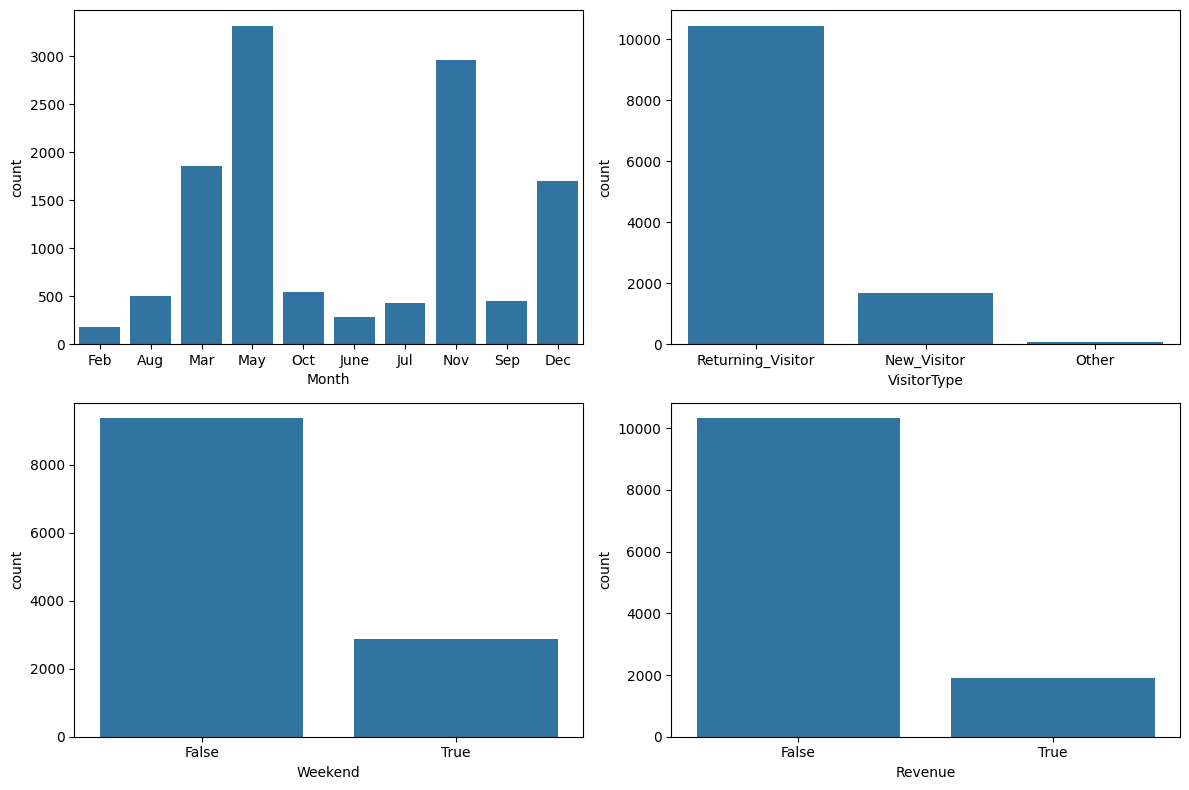

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='Month', data=df, ax=axes[0, 0])
sns.countplot(x='VisitorType', data=df, ax=axes[0, 1])
sns.countplot(x='Weekend', data=df, ax=axes[1, 0])
sns.countplot(x='Revenue', data=df, ax=axes[1, 1])


plt.tight_layout()
plt.show()


Видим большой дизбаланс классов у Revenue, лишь 16% значений имеют *True* у нашей целевой переменной. Стоит поработать над дизбалансом классов, так как это серьёзная проблема. Существует несколько вариантов решения данной проблемы: можно изменить размер датасета (с целью балансировки классов), или же при обучении модели задать классам веса. Альтернативой является использование метрик, устойчивым к дизбалансу классов, например F1. 

Теперь рассмотрим связь признаков с целевой переменной

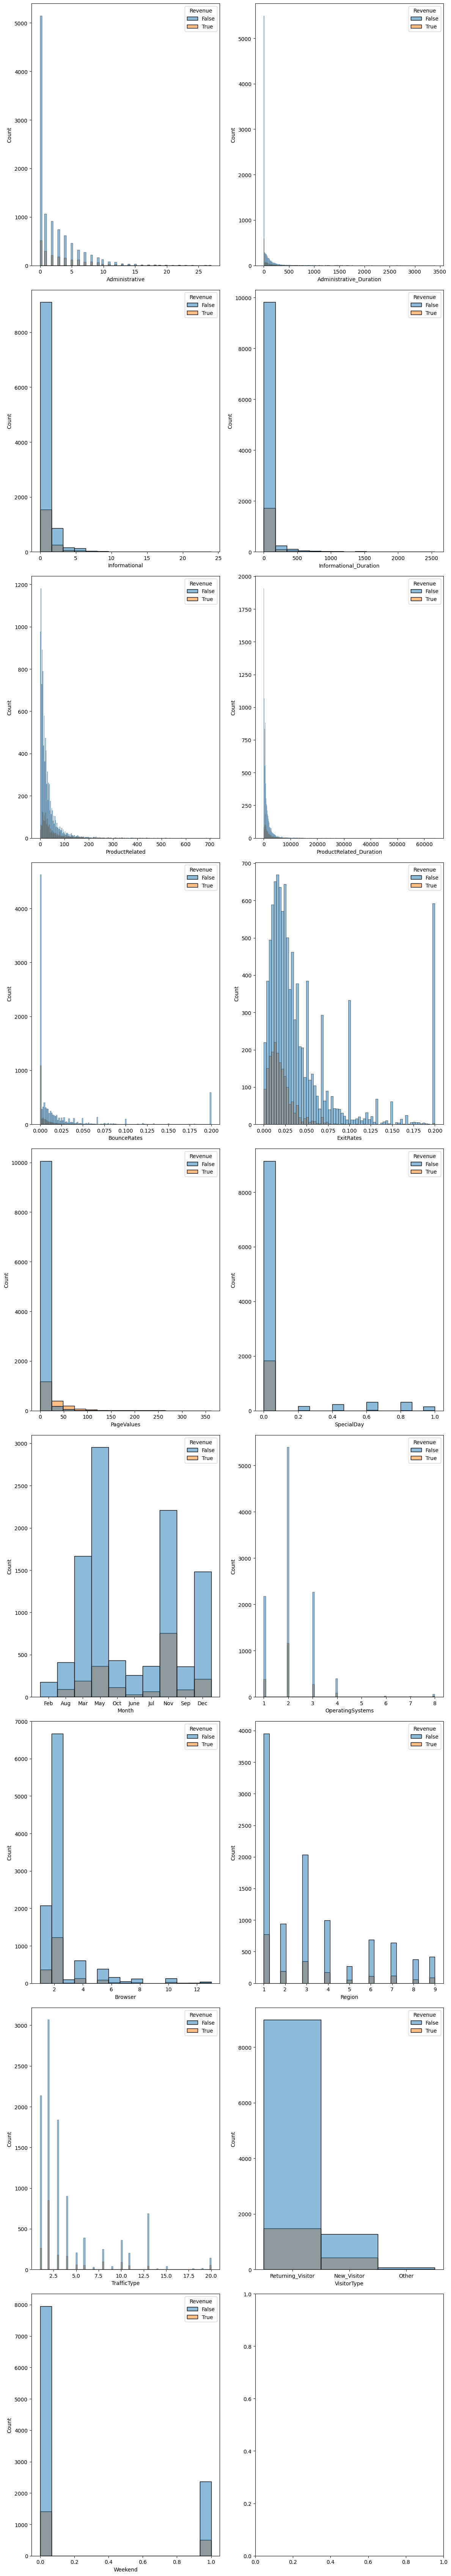

In [21]:
cols = df.columns
fig, axes = plt.subplots(int((len(cols))/2), 2, figsize=(12, 4*(len(cols)-1)))

cnt1 = 0
cnt2 = 0
for i in cols:
    if i != 'Revenue':
        ax = axes[int(cnt1), int(cnt2 % 2)]
        sns.histplot(data=df, x=i, hue='Revenue', ax=ax)
        if cnt2 % 2 == 1:
            cnt1 += 1
        cnt2 += 1
plt.tight_layout()
plt.show()


Наиболее показательным является зависимость просмотренных страниц (PageValues) от целевой переменной (Revenue). Графически видна связь - при большом объёме просмотренных страниц, число положительных исходов (True) кратно превышает отрицательные. 


In [22]:
pd.crosstab(index=df['Month'], columns=df['Revenue'], normalize='index').round(4)


Revenue,False,True
Month,,
Aug,0.8164,0.1836
Dec,0.8744,0.1256
Feb,0.9834,0.0166
Jul,0.8508,0.1492
June,0.8982,0.1018
Mar,0.8977,0.1023
May,0.8905,0.1095
Nov,0.7460,0.2540
Oct,0.7890,0.2110


In [23]:
pd.crosstab(index=df['Month'], columns=df['Revenue']).round(4)


Revenue,False,True
Month,,
Aug,409,92
Dec,1483,213
Feb,178,3
Jul,365,64
June,256,29
Mar,1667,190
May,2953,363
Nov,2212,753
Oct,430,115


## 3. Матрица корреляций

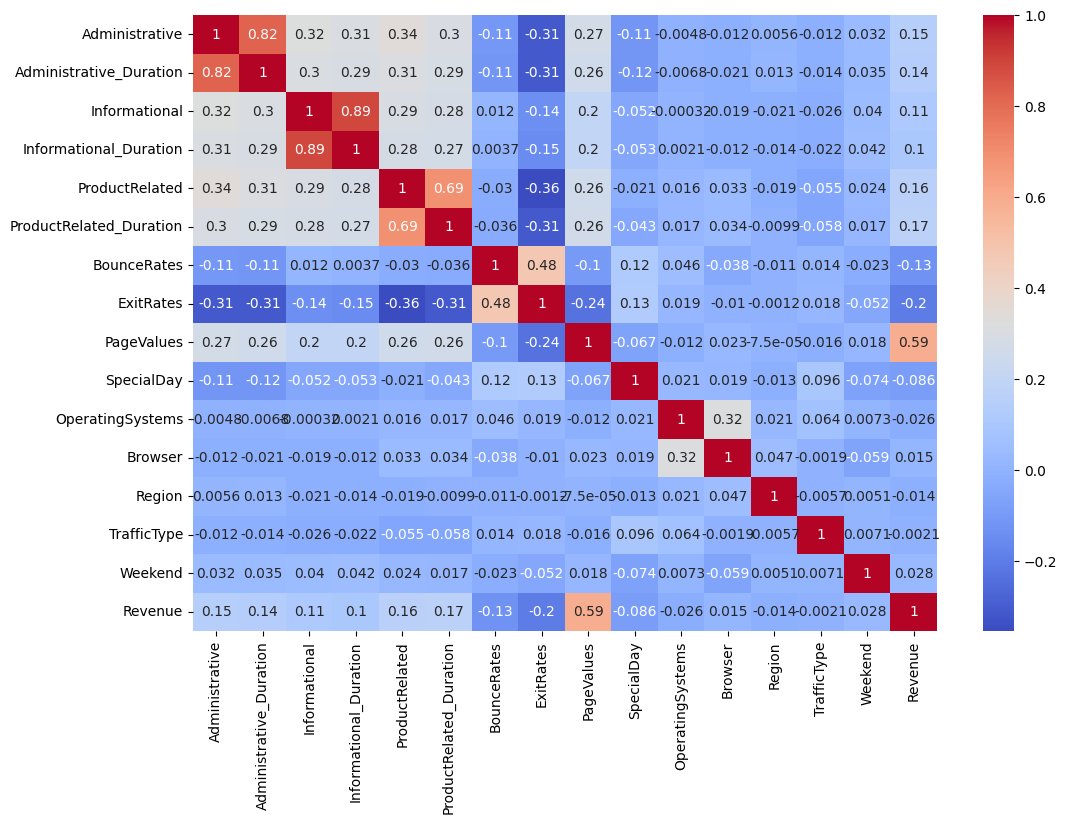

In [24]:
corr = df.corr(numeric_only=True, method='kendall')

plt.figure(figsize=(12, 8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

plt.show()


Матрица корреляций подтверждает нашу предыдущую гипотезу. Действительно, между Revenue и PagesValues имеется заметная корреляция (сильной, конечно, её нельзя назвать) - 0,59. Также можно попробовать оставить признаки с модулем корреляции >0.1, а остальные удалить. Ибо переменные без значительной связи не являются для нас полезными, а наоборот, могут даже снижать точность модели

## Также из-за наличия очень схожих признаков, может быть полезно посмотреть на VIF.

In [25]:
%pip install association-metrics -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import association_metrics as am

df_cat = df[['Month', 'VisitorType', 'Weekend', 'Revenue']].copy()

for col in df_cat.columns:
    if df_cat[col].dtype.name in ['object', 'category', 'bool']:
        df_cat[col] = df_cat[col].astype('category')

cramersv = am.CramersV(df_cat)
matrix_cramersv = cramersv.fit()

print(matrix_cramersv)


                Month  VisitorType   Weekend   Revenue
Month        1.000000     0.137251  0.064912  0.175457
VisitorType  0.137251     1.000000  0.053418  0.103550
Weekend      0.064912     0.053418  1.000000  0.027858
Revenue      0.175457     0.103550  0.027858  1.000000


c:\Users\tyrys\AppData\Local\Programs\Python\Python312\Lib\site-packages\association_metrics\categorical.py:100: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.matrix[x][y] = 1
c:\Users\tyrys\AppData\Local\Programs\Python\Python312\Lib\s

## Так как целевая переменная бинарная, в ANOVA нет смысла

## 4. Анализ целевой переменной 

<Axes: xlabel='count', ylabel='Revenue'>

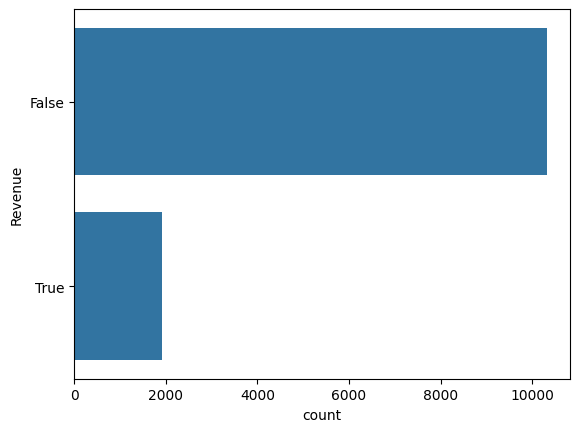

In [27]:
sns.countplot(data=df, y='Revenue')

In [28]:
df['Revenue'].value_counts(normalize=True)

Revenue
False    0.843875
True     0.156125
Name: proportion, dtype: float64

На графике представлено биноминальное распределение (т.к. принимаемые значения 1 (True) и 0(False)). 

График распределения имеет дисбаланс классов. False встречается в 84%, а True всего в 16%. Исходя из этого, нужно осторожно подходить к обучению моделей, например, изменить размер датасета таким образом, чтобы "выровнять" классы. Или же можно добавить "веса" классам. 

## 5. Pandas VS Polars

In [29]:
df_big = df.copy()

for i in range(200):
    df_big = pd.concat([df_big, df])

df_big.to_csv('df_big.csv', index=False)


In [30]:
df_big.shape, df.shape


((2456421, 18), (12221, 18))

In [31]:
%%time

df_pl = pl.read_csv('df_big.csv')


CPU times: total: 2.25 s
Wall time: 242 ms


In [32]:
%%time

df_pd = pd.read_csv('df_big.csv')


CPU times: total: 2.78 s
Wall time: 3.07 s


В считывании Polars оказался в 3.5 раза быстрее Pandas'а

In [33]:
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [34]:
%%time

df_pl.filter((pl.col('ProductRelated_Duration') > 20) & (pl.col('ExitRates') > 0.10))


CPU times: total: 46.9 ms
Wall time: 45.5 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
0,0.0,0,0.0,3,80.0,0.066667,0.133333,0.0,0.2,"""Feb""",3,2,1,3,"""Returning_Visitor""",false,false
0,0.0,0,0.0,8,400.8,0.05,0.120833,0.0,0.0,"""Feb""",1,1,1,3,"""Returning_Visitor""",false,false
0,0.0,0,0.0,2,27.0,0.15,0.15,0.0,0.0,"""Feb""",1,1,7,2,"""Returning_Visitor""",false,false
0,0.0,0,0.0,6,301.5,0.0,0.111111,0.0,0.0,"""Feb""",2,4,9,3,"""Returning_Visitor""",false,false
0,0.0,0,0.0,11,606.283333,0.028,0.119524,0.0,0.0,"""Feb""",2,4,3,1,"""Returning_Visitor""",false,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,0.0,0,0.0,3,44.5,0.066667,0.133333,0.0,0.0,"""Dec""",2,2,9,3,"""Returning_Visitor""",false,false
0,0.0,0,0.0,1,606.283333,0.2,0.2,0.0,0.0,"""Dec""",3,2,9,1,"""Returning_Visitor""",true,false
0,0.0,0,0.0,3,606.283333,0.2,0.2,0.0,0.0,"""Nov""",3,2,1,10,"""Returning_Visitor""",false,false


In [35]:
%%time

df_pd[(df_pd['ProductRelated_Duration'] > 20) & (df_pd['ExitRates'] > 0.1)]


CPU times: total: 0 ns
Wall time: 42.3 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
47,0,0.0,0,0.0,3,80.000000,0.066667,0.133333,0.0,0.2,Feb,3,2,1,3,Returning_Visitor,False,False
61,0,0.0,0,0.0,8,400.800000,0.050000,0.120833,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
105,0,0.0,0,0.0,2,27.000000,0.150000,0.150000,0.0,0.0,Feb,1,1,7,2,Returning_Visitor,False,False
119,0,0.0,0,0.0,6,301.500000,0.000000,0.111111,0.0,0.0,Feb,2,4,9,3,Returning_Visitor,False,False
124,0,0.0,0,0.0,11,606.283333,0.028000,0.119524,0.0,0.0,Feb,2,4,3,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456255,0,0.0,0,0.0,3,44.500000,0.066667,0.133333,0.0,0.0,Dec,2,2,9,3,Returning_Visitor,False,False
2456267,0,0.0,0,0.0,1,606.283333,0.200000,0.200000,0.0,0.0,Dec,3,2,9,1,Returning_Visitor,True,False
2456288,0,0.0,0,0.0,3,606.283333,0.200000,0.200000,0.0,0.0,Nov,3,2,1,10,Returning_Visitor,False,False
2456339,0,0.0,0,0.0,7,1749.000000,0.047619,0.104762,0.0,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


В сортировке Polars быстрее Pandas'a в 2.6 раза

In [36]:
%%time

df_pl.group_by('Month').agg([pl.max('ProductRelated'), pl.median('ProductRelated_Duration')])

CPU times: total: 188 ms
Wall time: 162 ms


Month,ProductRelated,ProductRelated_Duration
str,i64,f64
"""Dec""",449,606.283333
"""Aug""",686,631.4
"""Feb""",128,225.466667
"""Oct""",518,606.283333
"""May""",705,581.613095
"""Nov""",584,851.25
"""Mar""",328,494.5
"""June""",358,486.560058
"""Sep""",439,606.283333


In [37]:
%%time

df_pd.groupby('Month').agg({'ProductRelated': 'max', 'ProductRelated_Duration': 'median'})

CPU times: total: 15.6 ms
Wall time: 163 ms


,ProductRelated,ProductRelated_Duration
Month,,
Aug,686,631.400000
Dec,449,606.283333
Feb,128,225.466667
Jul,486,583.000000
June,358,486.560058
Mar,328,494.500000
May,705,581.613095
Nov,584,851.250000
Oct,518,606.283333


А вот в агрегации в eagle-запросе pandas оказался даже быстрее polars на 11%. Теперь посмотрим на возможности Polars в режиме lazy-запросов

In [38]:
%%time

q = (
    df_pl
        .lazy()
        .group_by('Month')
        .agg(
            [
                pl.max('ProductRelated'), 
                pl.median('ProductRelated_Duration')
            ]
        )
)

CPU times: total: 0 ns
Wall time: 1.01 ms


In [39]:
%%time

q.collect()

CPU times: total: 78.1 ms
Wall time: 76.9 ms


Month,ProductRelated,ProductRelated_Duration
str,i64,f64
"""Sep""",439,606.283333
"""Oct""",518,606.283333
"""June""",358,486.560058
"""Mar""",328,494.5
"""Feb""",128,225.466667
"""Aug""",686,631.4
"""Jul""",486,583.0
"""Dec""",449,606.283333
"""Nov""",584,851.25


С оптимизацией Polars оказался быстрее Pandas'а на 24%.

В большинстве случаев Polars выигрывает Pandas при работе с огромными данными, однако эта библиотека имеет не совсем привычный синтаксис. Это субъективно, но мне привычнее работать с Padnas'ом. 